## Week 10 Assignment: Document Classification

#### The Dataset - NLTK Movie Reviews
The dataset comes with NLTK library and consists and positive and negative movie reviews. We use the dataset to develop a classifier. We split the data into test data and training data, then test the performance of the classifier on a sample of the test data. 

In [1]:
#import the NLTK library
import nltk
import matplotlib as plt
import matplotlib.pyplot as py
plt.style.use('ggplot')
% matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
#load the movie review dataset
from nltk.corpus import movie_reviews as mvr

### 1.  Conduct some initial EDA of the movie review dataset

In [4]:
print mvr.categories()

[u'neg', u'pos']


In [5]:
#negative reviews
print mvr.fileids()[1:5]

[u'neg/cv001_19502.txt', u'neg/cv002_17424.txt', u'neg/cv003_12683.txt', u'neg/cv004_12641.txt']


In [6]:
#positive reviews
print mvr.fileids()[1000:1005]

[u'pos/cv000_29590.txt', u'pos/cv001_18431.txt', u'pos/cv002_15918.txt', u'pos/cv003_11664.txt', u'pos/cv004_11636.txt']


#### 1a. Examine one postive and negative movie review in more detail

In [7]:
pos_txt=mvr.words('pos/cv000_29590.txt')
neg_txt=mvr.words('neg/cv001_19502.txt')

In [8]:
print mvr.raw('pos/cv000_29590.txt')[0:500]

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject


In [9]:
print mvr.raw('neg/cv001_19502.txt')[0:500]

the happy bastard's quick movie review 
damn that y2k bug . 
it's got a head start in this movie starring jamie lee curtis and another baldwin brother ( william this time ) in a story regarding a crew of a tugboat that comes across a deserted russian tech ship that has a strangeness to it when they kick the power back on . 
little do they know the power within . . . 
going for the gore and bringing on a few action sequences here and there , virus still feels very empty , like a movie going for a


In [10]:
nltk.FreqDist(neg_txt)

FreqDist({u',': 18, u'.': 14, u"'": 13, u'a': 13, u'the': 13, u's': 9, u'of': 8, u'and': 8, u'movie': 5, u'know': 4, ...})

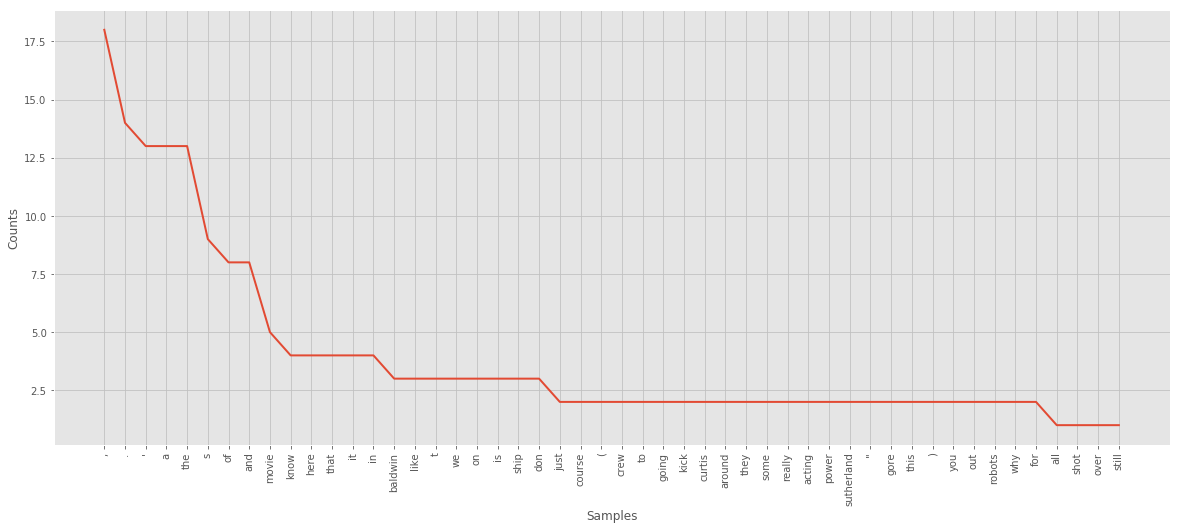

In [11]:
py.figure(figsize=(20, 8)) 
nltk.FreqDist(neg_txt).plot(50,cumulative=False)

In [12]:
# import and exclude stop words
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [13]:
#exclude stopwords
neg_txt_alt=[w for w in neg_txt if w not in stopwords]
#exclude punctuation
neg_txt_alt=[w for w in neg_txt_alt if w.isalpha()]

In [14]:
neg_dist=nltk.FreqDist(neg_txt_alt)

In [15]:
neg_dist=sorted(neg_dist.items(),key=lambda kv:kv[1],reverse=True)

In [16]:
for i in range(20): 
    print neg_dist[i][0],neg_dist[i][1]

movie 5
know 4
baldwin 3
like 3
ship 3
crew 2
going 2
kick 2
around 2
course 2
really 2
acting 2
power 2
sutherland 2
gore 2
curtis 2
robots 2
shot 1
russian 1
still 1


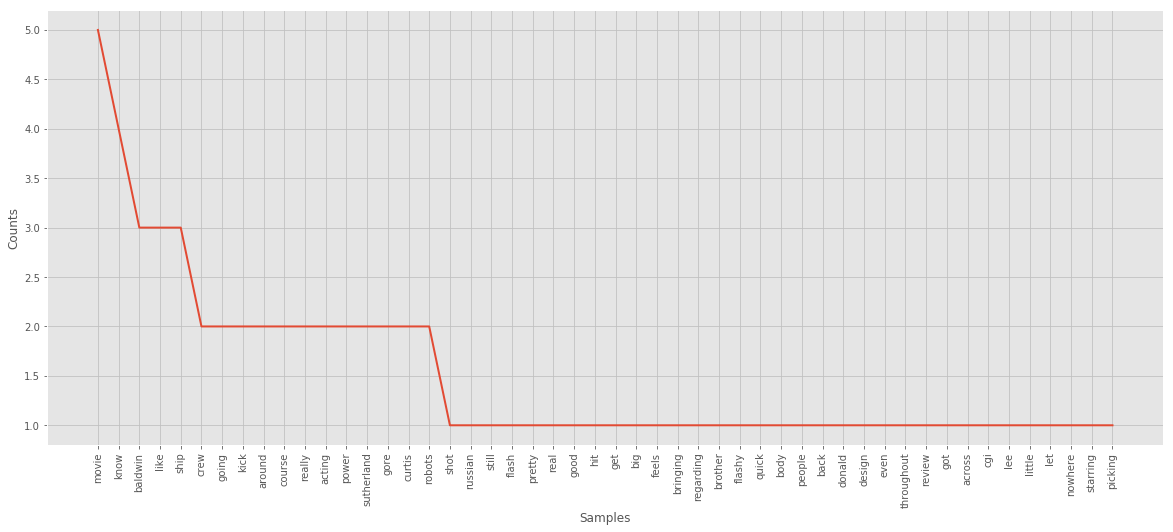

In [17]:
py.figure(figsize=(20, 8)) 
nltk.FreqDist(neg_txt_alt).plot(50,cumulative=False)

In [18]:
nltk.FreqDist(neg_txt_alt).keys()[1:10]

[u'russian',
 u'still',
 u'baldwin',
 u'flash',
 u'crew',
 u'going',
 u'pretty',
 u'kick',
 u'real']

### 2. Develop the training-set and test-set for the data

In [19]:
# combined the movie review corpus and create training and test set
documents=[(list(mvr.words(fileid)),category)
            for category in mvr.categories()
            for fileid in mvr.fileids(category)]

In [20]:
import random
random.shuffle(documents)

In [21]:
len(documents)

2000

In [22]:
#select training set and the development-test set
training_set=documents[0:999]
dev_test=documents[1000:1499]
test_set=documents[1500:2000]

### 3. Extract features from the data for model development

#### 3.1 Compare the lengths of the movie reviews

In [23]:
p=[len(d) for (d,c) in training_set if c=='pos']

In [24]:
n=[len(d) for (d,c) in training_set if c=='neg']

In [25]:
p=pd.Series(p)
n=pd.Series(n)

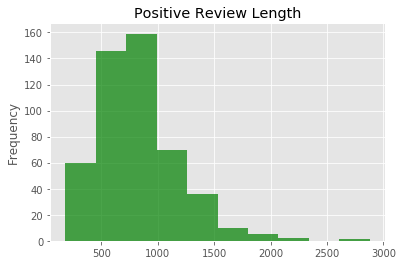

In [26]:
#py
p.plot.hist(alpha=0.7,title="Positive Review Length", color="green")

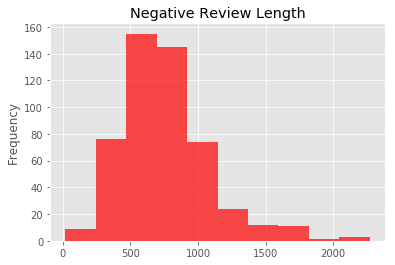

In [27]:
n.plot.hist(alpha=0.7,title="Negative Review Length",color="red")

In [28]:
#mean review length
print "Metric","Mean","Max","Min","Median"
print "postive", round(p.mean()), p.max(), p.min(),p.median()
print "negative", round(n.mean()),n.max(), n.min(),n.median()

Metric Mean Max Min Median
postive 818.0 2879 181 792.0
negative 761.0 2271 19 718.5


positive review length both mean and median seems to be larger than negative review length, and could be used as feature in the model. 

#### 3.2 Compare the number of stop words in the movie reviews

In [29]:
# count of stop words by review type
pos_stp=[]
neg_stp=[]
for d,c in training_set: 
    if c=='pos':
        p_stop=[w for w in d if w in stopwords]
        pos_stp.append(len(p_stop))
    if c=='neg':
        n_stop=[w for w in d if w in stopwords]
        neg_stp.append(len(n_stop))

In [30]:
pos_stp=pd.Series(pos_stp)
neg_stp=pd.Series(neg_stp)

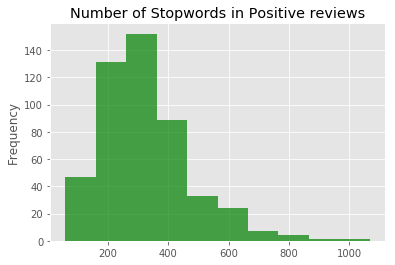

In [31]:
pos_stp.plot.hist(alpha=0.7,title="Number of Stopwords in Positive reviews",color="green")

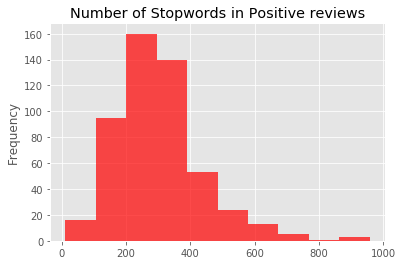

In [32]:
neg_stp.plot.hist(alpha=0.7,title="Number of Stopwords in Positive reviews",color="red")

In [33]:
#mean review length
print "Metric","Mean","Max","Min","Median"
print "postive", round(pos_stp.mean()), pos_stp.max(), pos_stp.min(),pos_stp.median()
print "negative", round(neg_stp.mean()),neg_stp.max(), neg_stp.min(),neg_stp.median()

Metric Mean Max Min Median
postive 323.0 1068 59 301.0
negative 303.0 959 11 286.5


In [34]:
# Normalized for review length
pos_prop=pos_stp/p
neg_prop=neg_stp/n

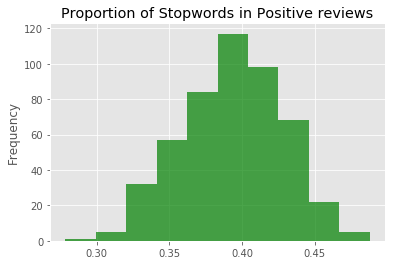

In [35]:
pos_prop.plot.hist(alpha=0.7,title="Proportion of Stopwords in Positive reviews",color="green")

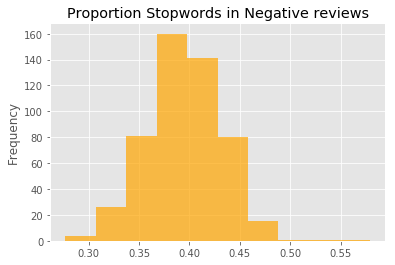

In [36]:
neg_prop.plot.hist(alpha=0.7,title="Proportion Stopwords in Negative reviews",color="orange")

In [37]:
#mean, median, min and max for proportion of stop words
print "Metric","Mean","Max","Min","Median"
print "postive", round(pos_prop.mean(),3), round(pos_prop.max(),2), round(pos_prop.min(),2),round(pos_prop.median(),3)
print "negative", round(neg_prop.mean(),3),round(neg_prop.max(),2), round(neg_prop.min(),2),round(neg_prop.median(),3)

Metric Mean Max Min Median
postive 0.393 0.49 0.28 0.396
negative 0.396 0.58 0.28 0.394


Not a significant difference in the proportion of stop words between positive and negative reviews. The difference in the total is more reflective of the review length

In [38]:
#define common terms - that might not be informative
common=['movie','movies','film','films','character','characters']

In [39]:
# count of stop words by review type
pos_words=[]
neg_words=[]
for d,c in training_set: 
    if c=='pos':
        x=[w for w in d if w not in stopwords and w.isalpha() and w not in common]
        pos_words.append(x)
    if c=='neg':
        y=[w for w in d if w not in stopwords and w.isalpha() and w not in common]
        neg_words.append(y)

In [40]:
#flatten the lists
pos_words=[item for sublist in pos_words for item in sublist]
neg_words=[item for sublist in neg_words for item in sublist]

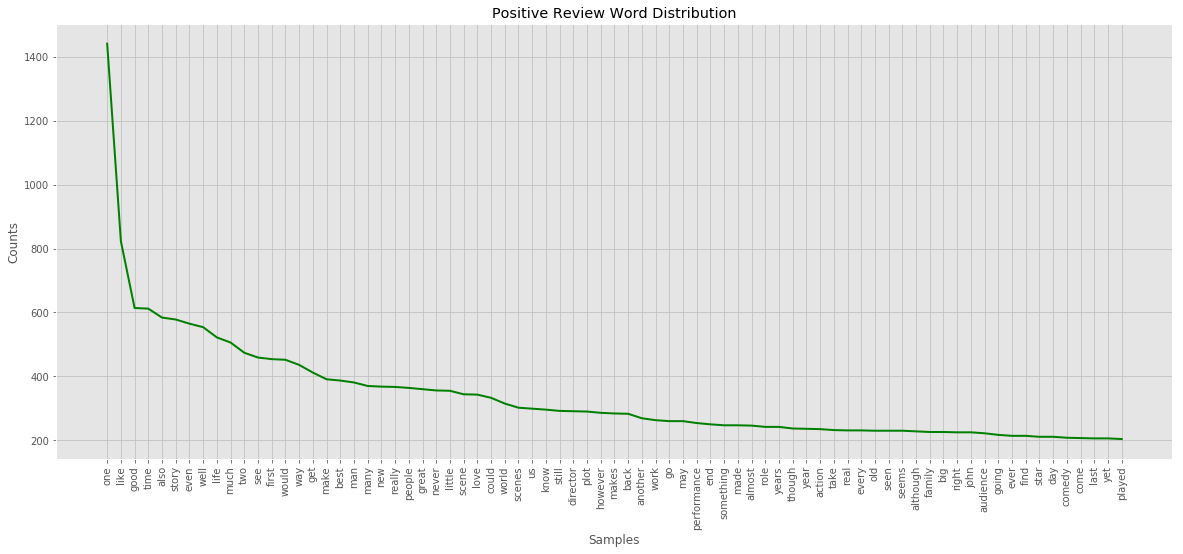

In [41]:
# Frequency of words in positive reviews
pos_rev_dist=nltk.FreqDist(pos_words)
py.figure(figsize=(20, 8)) 
pos_rev_dist.plot(75,cumulative=False, color="green",title='Positive Review Word Distribution')

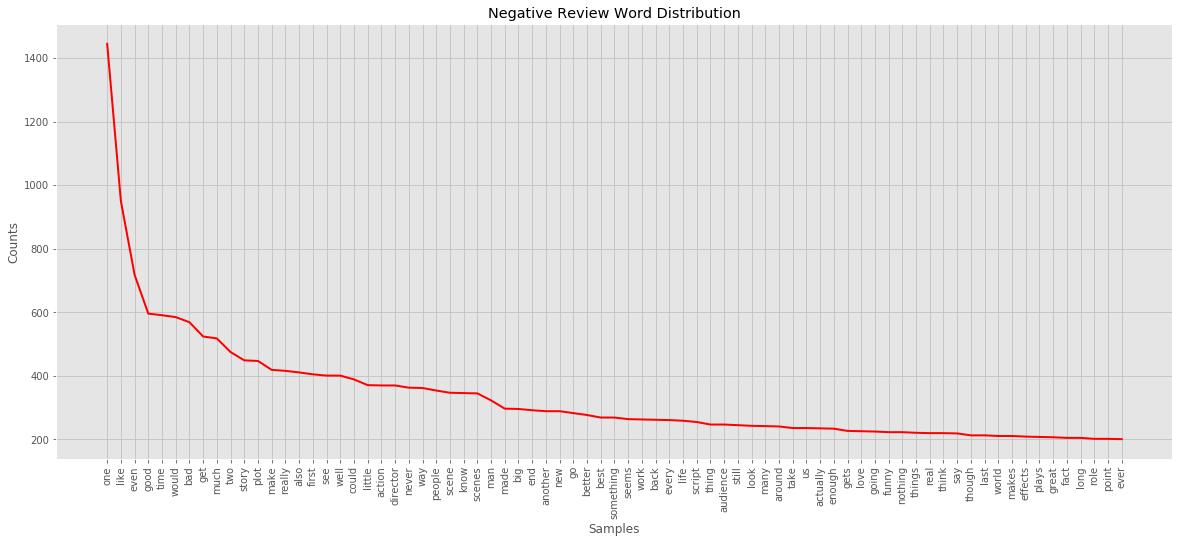

In [42]:
#Frequency of words in negative reviews
neg_rev_dist=nltk.FreqDist(neg_words)
py.figure(figsize=(20, 8)) 
neg_rev_dist.plot(75,cumulative=False, color="red", title='Negative Review Word Distribution')

In [43]:
neg_rev_dist=sorted(neg_rev_dist.items(),key=lambda kv:kv[1],reverse=True)
pos_rev_dist=sorted(pos_rev_dist.items(),key=lambda kv:kv[1],reverse=True)

In [44]:
#length of review distributions
len(neg_rev_dist)
#

20956

In [45]:
neg_rev_dist_k=[i for (i,num) in neg_rev_dist]
pos_rev_dist_k=[i for (i,num) in pos_rev_dist]

#### 3.3 Develop a feature Extractor 

In [46]:
# develop a combined list of words for model fitting 
combined=pos_rev_dist_k[:500]

In [47]:
for w in neg_rev_dist_k[:1000]:
    if w not in combined:
        combined.append(w)

In [48]:
len(combined)

1021

In [49]:
combined=[]
for (d,c) in training_set: 
    for w in d: 
        if w not in stopwords and w.isalpha():
            combined.append(w)
#combined=[w for w in d for (d,c) in training_set if w not in stopwords and w.isalpha()]
#combined_dist=nltk.FreqDist(combined)

In [50]:
len(combined)

348809

In [51]:
combined_dist=nltk.FreqDist(combined)
len(combined_dist)

29431

In [52]:
combined_dist

FreqDist({u'film': 4677, u'one': 2886, u'movie': 2846, u'like': 1773, u'even': 1283, u'good': 1210, u'time': 1203, u'would': 1037, u'story': 1027, u'much': 1024, ...})

In [53]:
combined_dist_s=sorted(combined_dist.items(),key=lambda kv:kv[1],reverse=True)

In [54]:
combined_dist_s[1:10]

[(u'one', 2886),
 (u'movie', 2846),
 (u'like', 1773),
 (u'even', 1283),
 (u'good', 1210),
 (u'time', 1203),
 (u'would', 1037),
 (u'story', 1027),
 (u'much', 1024)]

In [55]:
selected_words=[]
for w, num in combined_dist_s: 
    selected_words.append(w)

In [56]:
selected_words_s=selected_words[:1000]

In [57]:
def document_features(docs):
    wrds=set(docs)
    features={}
    features['length']=len(docs)
    for w in selected_words_s:
        features['contains(%s)' % w]=(w in wrds)
    return features

## 4. Implement the feature extractor

In [58]:
featureset=[(document_features(d),c) for (d,c) in training_set]

In [59]:
classifier=nltk.NaiveBayesClassifier.train(featureset)

In [60]:
print nltk.classify.accuracy(classifier,featureset)

0.890890890891


In [61]:
classifier.show_most_informative_features(10)

Most Informative Features
        contains(seagal) = True              neg : pos    =      9.3 : 1.0
          contains(lame) = True              neg : pos    =      7.4 : 1.0
          contains(mars) = True              neg : pos    =      5.2 : 1.0
        contains(wasted) = True              neg : pos    =      5.1 : 1.0
         contains(awful) = True              neg : pos    =      5.0 : 1.0
         contains(worst) = True              neg : pos    =      4.9 : 1.0
    contains(ridiculous) = True              neg : pos    =      4.8 : 1.0
        contains(subtle) = True              pos : neg    =      4.4 : 1.0
      contains(terrible) = True              neg : pos    =      4.0 : 1.0
        contains(stupid) = True              neg : pos    =      3.8 : 1.0


### 4.2 Test the classifier on the development set

In [62]:
dev_feature_set=[(document_features(d),c) for (d,c) in dev_test]

In [63]:
print nltk.classify.accuracy(classifier,dev_feature_set)

0.771543086172


In [64]:
# check the errors on the development set
errors = []
for (doc, tag) in dev_test:
    a=sorted(nltk.FreqDist(doc).items(),key=lambda kv:kv[1],reverse=True)
    guess = classifier.classify(document_features(doc))
    if guess != tag:
        errors.append( (tag, guess, a[0][0],a[1][0],a[2][0]) )

In [65]:
for (tag, guess, w1,w2,w3) in errors:
    print('correct={:<4} guess={:<4s} w1={:<15} w2={:<15} w3={:<15}'.format(tag, guess, w1,w2,w3))

correct=neg  guess=pos  w1=the             w2=,               w3=a              
correct=pos  guess=neg  w1=the             w2=.               w3=,              
correct=neg  guess=pos  w1=the             w2=.               w3=,              
correct=pos  guess=neg  w1=,               w2=the             w3=.              
correct=neg  guess=pos  w1=the             w2=,               w3=of             
correct=pos  guess=neg  w1=and             w2=a               w3=.              
correct=neg  guess=pos  w1=.               w2=,               w3='              
correct=pos  guess=neg  w1=,               w2=the             w3=.              
correct=neg  guess=pos  w1=the             w2="               w3=,              
correct=pos  guess=neg  w1=the             w2=.               w3=to             
correct=neg  guess=pos  w1=.               w2=the             w3=,              
correct=pos  guess=neg  w1=the             w2=.               w3=of             
correct=neg  guess=pos  w1=,

In [66]:
##classification accuracy on the test set
test_feature_set=[(document_features(d),c) for (d,c) in test_set]

In [67]:
final_set=documents[0:1499]

In [68]:
final_feature_set=[(document_features(d),c) for (d,c) in final_set]

In [69]:
classifier_final=nltk.NaiveBayesClassifier.train(final_feature_set)

In [70]:
classifier_final.show_most_informative_features(10)

Most Informative Features
          contains(lame) = True              neg : pos    =      9.3 : 1.0
        contains(seagal) = True              neg : pos    =      7.7 : 1.0
        contains(wasted) = True              neg : pos    =      5.0 : 1.0
         contains(awful) = True              neg : pos    =      4.8 : 1.0
         contains(worst) = True              neg : pos    =      4.7 : 1.0
         contains(waste) = True              neg : pos    =      4.4 : 1.0
    contains(ridiculous) = True              neg : pos    =      4.3 : 1.0
        contains(subtle) = True              pos : neg    =      4.1 : 1.0
        contains(stupid) = True              neg : pos    =      3.9 : 1.0
      contains(terrible) = True              neg : pos    =      3.8 : 1.0


In [71]:
print nltk.classify.accuracy(classifier_final,test_feature_set)

0.808
